In [49]:
## import modules
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from keras.models import load_model
from keras.utils import plot_model

import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns

import os
import numpy as np
from IPython.display import Image

%matplotlib inline

In [50]:
# parameters
batch_size = 128 # weights/ bias are updated after seeing these many observations
num_classes = 10 # since we have 10 digits, so 10 predictions
epochs = 20 # number of times, the model will go over all the data

In [62]:
# download the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

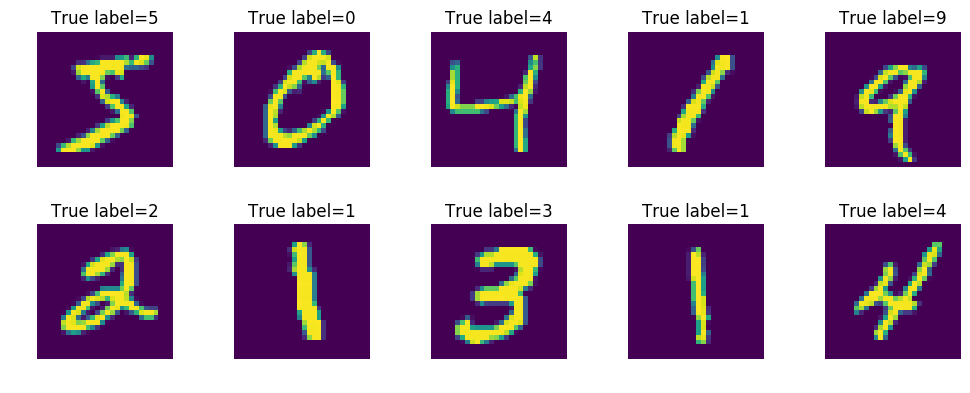

In [85]:
# plot some digits and their labels
plt.figure(figsize=(10,4), dpi=100)

for i in range(10):
    img = x_train[i]
    label = y_train[i]
    plt.subplot(2,5,i+1)
    plt.imshow(img)
    plt.title('True label=' + str(label))
    plt.axis('off')
    
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'distribution of digits in train set')

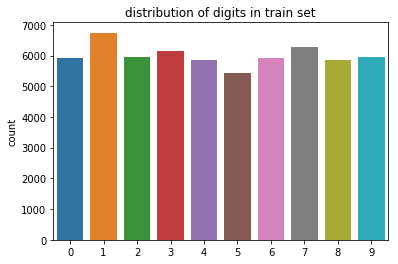

In [64]:
# distribution of digits in train set
sns.countplot(y_train).set_title('distribution of digits in train set')

Text(0.5, 1.0, 'distribution of digits in test set')

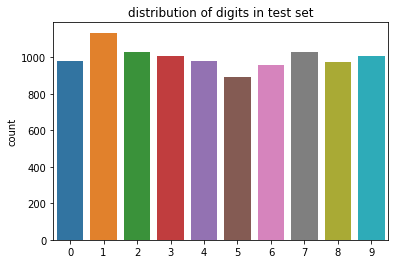

In [65]:
# distribution of digits in test set
sns.countplot(y_test).set_title('distribution of digits in test set')

In [58]:
# since we are dealing fully connected network, flatten out 28X28 = 724
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.
x_test /= 255.
print(x_train.shape[0], 'train samples, each with length', x_train.shape[1])
print(x_test.shape[0], 'test samples, each with length', x_test.shape[1])

60000 train samples
10000 test samples


In [59]:
# convert class vectors to binary class matrices
print ('before converting to categorical', y_train[0])
y_train = to_categorical(y_train, num_classes)
print ('before converting to categorical', y_train[0])

before converting to categorical 5
before converting to categorical [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [8]:
# intialize Sequential and then add two dense layers
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,), name='dense_1'))
model.add(Dropout(0.2, name='dropout_1'))
model.add(Dense(512, activation='relu', name='dense_2'))
model.add(Dropout(0.2, name='dropout_2'))
model.add(Dense(num_classes, activation='softmax', name='dense_3'))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_______________

In [9]:
# compile model
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop'
              metrics=['accuracy'])

In [12]:
# fit the model
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

Instructions for updating:
Use tf.cast instead.
Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 9s 164us/step - loss: 0.2643 - acc: 0.9174 - val_loss: 0.1040 - val_acc: 0.9688
Epoch 2/20
54000/54000 [==============================] - 9s 166us/step - loss: 0.1111 - acc: 0.9669 - val_loss: 0.0834 - val_acc: 0.9758
Epoch 3/20
54000/54000 [==============================] - 8s 155us/step - loss: 0.0810 - acc: 0.9755 - val_loss: 0.0785 - val_acc: 0.9777
Epoch 4/20
54000/54000 [==============================] - 8s 155us/step - loss: 0.0647 - acc: 0.9803 - val_loss: 0.0685 - val_acc: 0.9812
Epoch 5/20
54000/54000 [==============================] - 9s 169us/step - loss: 0.0528 - acc: 0.9842 - val_loss: 0.0874 - val_acc: 0.9797
Epoch 6/20
54000/54000 [==============================] - 9s 166us/step - loss: 0.0479 - acc: 0.9859 - val_loss: 0.0982 - val_acc: 0.9777
Epoch 7/20
54000/54000 [==============================] - 8s 150us/step - l

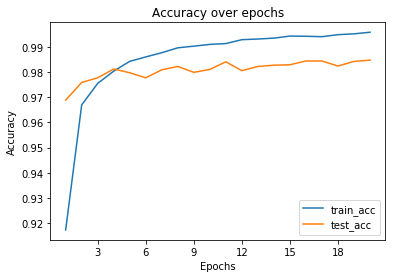

In [13]:
# plot the accuracy over epochs
plt.plot([int(x) for x in range(1, 21)], history.history['acc'], label = 'train_acc')
plt.plot([int(x) for x in range(1, 21)], history.history['val_acc'], label = 'test_acc')
plt.gca().xaxis.set_major_locator(MaxNLocator(prune='lower', integer=True))
plt.title('Accuracy over epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

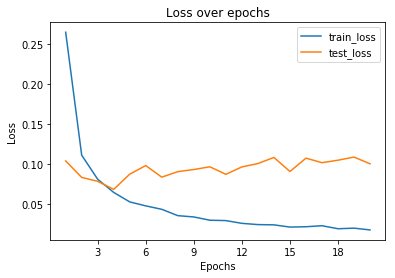

In [14]:
# plot the loss over epochs
plt.plot([int(x) for x in range(1, 21)], history.history['loss'], label = 'train_loss')
plt.plot([int(x) for x in range(1, 21)], history.history['val_loss'], label = 'test_loss')
plt.gca().xaxis.set_major_locator(MaxNLocator(prune='lower', integer=True))
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [15]:
# find the predictions for test dataset
pred = model.predict(x_test)
pred = [np.argmax(p) for p in pred]

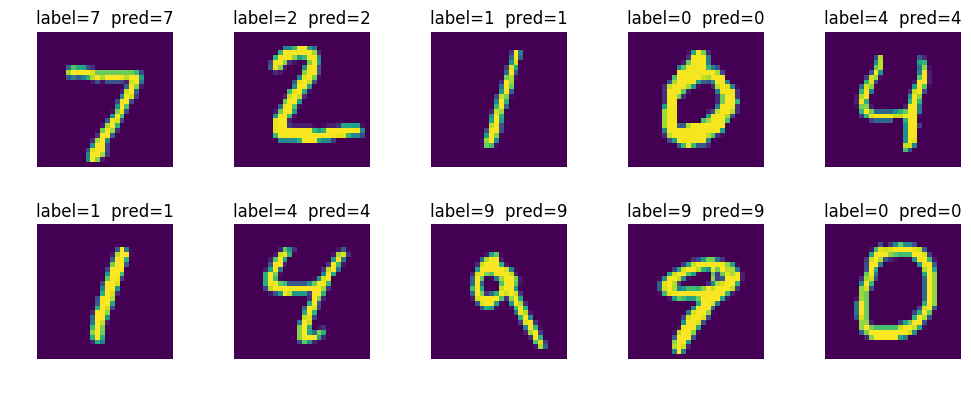

In [16]:
# plot the digits that were identified correctly
plt.figure(figsize=(10,4), dpi=100)
i=0
num_img = 0
while True:
    img = x_test[i]
    label = y_test[i]
    p = pred[i]
    if label==p:
        num_img+=1
        plt.subplot(2,5,num_img)
        plt.imshow(img.reshape(28,28))
        plt.title('label='+str(label) + '  ' + 'pred=' + str(p))
        plt.axis('off')
    i+=1
    if num_img>9 or i>x_test.shape[0]-1:
        break

plt.tight_layout()
plt.show()

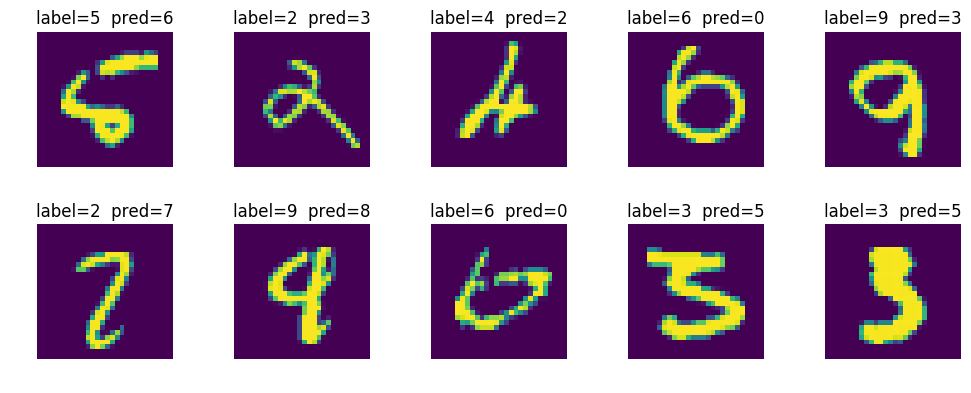

In [17]:
# plot the digits that were classified incorrectly
plt.figure(figsize=(10,4), dpi=100)
i=0
num_img = 0
while True:
    img = x_test[i]
    label = y_test[i]
    p = pred[i]
    if label!=p:
        num_img+=1
        plt.subplot(2,5,num_img)
        plt.imshow(img.reshape(28,28))
        plt.title('label='+str(label) + '  ' + 'pred=' + str(p))
        plt.axis('off')
    i+=1
    if num_img>9 or i>x_test.shape[0]-1:
        break

plt.tight_layout()
plt.show()

In [60]:
# find accuracy on train and test 
y_test = to_categorical(y_test, num_classes)
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

score = model.evaluate(x_train, y_train, verbose=0)
print('Train loss:', score[0])
print('Train accuracy:', score[1])

Test loss: 0.1222205524240695
Test accuracy: 0.9826
Train loss: 0.015225128296605741
Train accuracy: 0.9971666666666666


In [19]:
# save the model
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_mnist_nn_network_trained_model.h5'

In [20]:
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at /Users/i24009/Desktop/experiments-with-keras/saved_models/keras_mnist_nn_network_trained_model.h5 


In [1]:
# load saved model. can be trained from here as well
model = load_model('saved_models/keras_mnist_nn_network_trained_model.h5')

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


In [10]:
# get the weights and bias for layers
W = model.layers[0].get_weights()
W = np.squeeze(W)
print("W shape : ", W.shape) 

W shape :  (2,)


In [28]:
# get the config for first layer
model.layers[0].get_config()

{'name': 'dense_1',
 'trainable': True,
 'batch_input_shape': (None, 784),
 'dtype': 'float32',
 'units': 512,
 'activation': 'relu',
 'use_bias': True,
 'kernel_initializer': {'class_name': 'VarianceScaling',
  'config': {'scale': 1.0,
   'mode': 'fan_avg',
   'distribution': 'uniform',
   'seed': None}},
 'bias_initializer': {'class_name': 'Zeros', 'config': {}},
 'kernel_regularizer': None,
 'bias_regularizer': None,
 'activity_regularizer': None,
 'kernel_constraint': None,
 'bias_constraint': None}

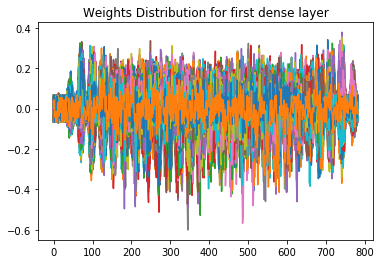

In [70]:
# plot the weight for first dense layer
plt.plot(W[0])
plt.title('Weights Distribution for first dense layer')
plt.show()

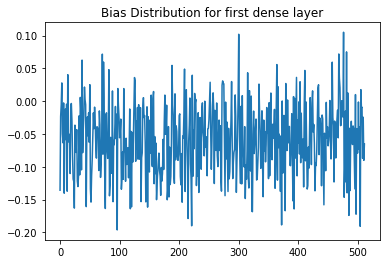

In [71]:
# plot the bias for first dense layer
plt.plot(W[1])
plt.title('Bias Distribution for first dense layer')
plt.show()

In [80]:
# get the second dense layer
W = model.layers[2].get_weights()
print("W shape : ", len(W) )

W shape :  2


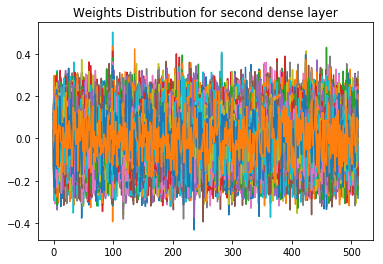

In [82]:
# plot the weight for the second dense layer
plt.plot(W[0])
plt.title('Weights Distribution for second dense layer')
plt.show()

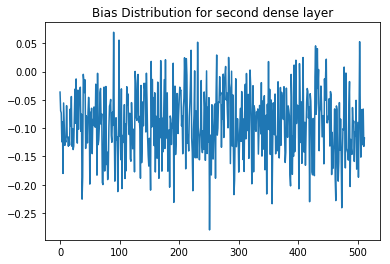

In [83]:
# plot the bias for the second dense layer
plt.plot(W[1])
plt.title('Bias Distribution for second dense layer')
plt.show()

In [35]:
# observe some values
len(W[0]), W[0][0]

(784,
 array([ 5.14551252e-03, -3.88936847e-02, -1.96239911e-02, -1.83191001e-02,
        -3.67019176e-02,  2.89765075e-02, -4.84123826e-04, -1.60068646e-02,
         5.91171831e-02, -5.69630265e-02, -5.67977838e-02,  5.18467426e-02,
        -8.05052742e-03,  5.54210246e-02, -3.38389874e-02, -4.56054956e-02,
         2.20498592e-02, -6.49692342e-02,  5.39471284e-02,  3.58343348e-02,
         4.69371900e-02, -5.21771610e-04,  2.37249285e-02, -5.20123914e-02,
         2.03869566e-02,  4.39750850e-02,  4.92746159e-02,  4.26609144e-02,
        -3.85370851e-02, -3.94101739e-02,  6.04146272e-02, -6.47480413e-03,
        -1.31154135e-02, -1.18657909e-02, -2.32961737e-02, -5.06624207e-02,
         5.02188504e-03,  3.83911952e-02,  9.70763713e-03,  5.84470183e-02,
         4.58118096e-02, -6.37204051e-02,  2.02115178e-02, -6.11885525e-02,
        -6.58100024e-02, -2.29728147e-02,  6.18812293e-02,  4.34735864e-02,
         5.02302721e-02, -2.02708393e-02, -5.25353998e-02,  4.84423786e-02,
      

In [46]:
# save plot model
plot_model(model, to_file='model.png')

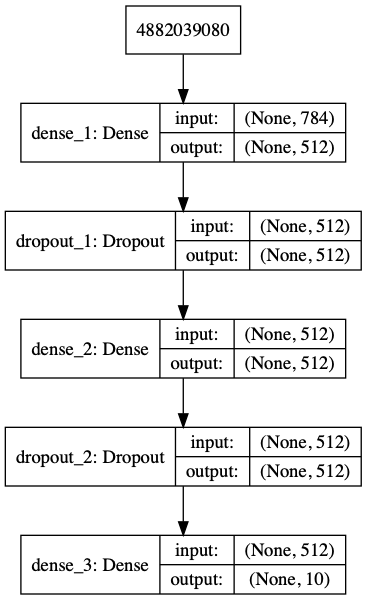

In [47]:
# show the model
Image(retina=True, filename='model.png')